# House Grade Prediction

### Build Objective
- Build a predictive model to determine the Grade of House(A,B,C,D and E)

### Technical Goals for Classifier 

- Understand the data very well. Do all transformations/ Data engineering / etc. whatever applicable
- Perform Exploratory Data analysis
- Carry out all data mining task
- Identify the sailent features that will determine the best results
- Perform the evaluation to select the best algorithms


In [63]:
# import libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold   # splitting the data
from sklearn import preprocessing                      # for data preprocessing functions
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder      # scaling and label encoding
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score       # accuracy calculation or evaluation
from sklearn.metrics import recall_score,f1_score,roc_auc_score,roc_curve      # accuracy calculation or evaluation

In [2]:
# load the four dataset
df =pd.read_csv(r"C:\Users\DELL\Downloads\DS3_C6_S2_Classification_HouseGrade_Data_Project.csv")
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


In [3]:
# checking structure

df.shape  # here we have 3000 rows and 14 columns

(3000, 14)

In [4]:
# checking data types
df.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

In [5]:
# checking size
df.size  # here we have size of our data set that's 42000

42000

In [6]:
# summarize data

df.describe().T  # here we find count mean max standar deviation of each column for whole data set

,count,mean,std,min,25%,50%,75%,max
Id,3000.0,1500.500000,866.169729,1.0,750.75,1500.5,2250.25,3000.0
Area(total),3000.0,325.117000,20.507742,290.0,308.00,325.0,343.00,360.0
Trooms,3000.0,7.021667,1.421221,5.0,6.00,7.0,8.00,9.0
Nbedrooms,3000.0,5.023000,1.634838,2.0,4.00,5.0,6.00,8.0
Nbwashrooms,3000.0,4.513667,1.715263,1.0,3.00,4.0,6.00,8.0
Twashrooms,3000.0,6.010667,1.786136,2.0,5.00,6.0,7.00,10.0
Roof(Area),3000.0,48.980667,48.746641,0.0,0.00,71.0,96.00,120.0
Lawn(Area),3000.0,95.609333,14.837388,70.0,83.00,96.0,109.00,120.0
Nfloors,3000.0,4.013333,1.621532,1.0,3.00,4.0,5.00,7.0
API,3000.0,70.190667,17.563460,40.0,55.00,70.0,85.00,100.0


In [7]:
# checking info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [8]:
# checking null values
df.isnull().sum()  

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

In [9]:
# there is no null value prsent in dataset

In [10]:
#Checking for Duplicate entries
df.drop("Id",axis=1).duplicated().sum()  # there is no duplicate value

0

In [11]:
col = ['roof','Grade']
label_encoder = LabelEncoder()
for i in col:
    df[i] = df[i].astype('category')                   # converting non numeric to categorical
    df[i] = label_encoder.fit_transform(df[i])         # converting categorical to numeric dtype

In [12]:
#here we have 2 object column in dataset for that we apply label encoding(converting to numerical so machine can read that data)

In [13]:
df.head()    # after conversion we can see it's converting in numeric and some speciic number assign for that

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,0,0,76,2,79,6,3481,3
1,2,358,5,4,3,4,1,71,96,3,72,4,3510,3
2,3,324,7,5,4,5,1,101,117,5,64,3,3748,2
3,4,330,6,4,3,5,1,101,82,2,59,2,3134,3
4,5,320,7,4,4,5,0,0,75,3,40,1,3843,3


In [14]:
# like that i'm mentioning for Grade :- 0 = A, 1 = B, C = 2, D = 3, E = 4

In [15]:
# checking data types again
df.dtypes    # now all columns in numeric form so macine can read easily and show the output

Id                int64
Area(total)       int64
Trooms            int64
Nbedrooms         int64
Nbwashrooms       int64
Twashrooms        int64
roof              int32
Roof(Area)        int64
Lawn(Area)        int64
Nfloors           int64
API               int64
ANB               int64
Expected price    int64
Grade             int32
dtype: object

In [16]:
# m-1)
# checking correlation for our target variable

df.corr()['Grade'] 

Id               -0.006074
Area(total)      -0.177332
Trooms           -0.875145
Nbedrooms        -0.865389
Nbwashrooms      -0.847319
Twashrooms       -0.819280
roof             -0.166635
Roof(Area)       -0.170259
Lawn(Area)       -0.051200
Nfloors          -0.787623
API              -0.099000
ANB              -0.024025
Expected price   -0.760820
Grade             1.000000
Name: Grade, dtype: float64

In [17]:
# m-2)
# checking correlation for our target variable

df.corr()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
Id,1.000000,0.003186,0.003165,0.004814,0.003496,0.001092,0.011059,0.013046,0.006309,-0.010939,-0.003739,-0.013219,0.009216,-0.006074
Area(total),0.003186,1.000000,0.019041,0.031328,0.031819,0.038509,0.014229,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,-0.177332
Trooms,0.003165,0.019041,1.000000,0.865878,0.827072,0.794870,0.025142,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,-0.875145
Nbedrooms,0.004814,0.031328,0.865878,1.000000,0.956578,0.919158,0.023058,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,-0.865389
Nbwashrooms,0.003496,0.031819,0.827072,0.956578,1.000000,0.960007,0.028549,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,-0.847319
Twashrooms,0.001092,0.038509,0.794870,0.919158,0.960007,1.000000,0.028212,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,-0.819280
roof,0.011059,0.014229,0.025142,0.023058,0.028549,0.028212,1.000000,0.976561,-0.004640,0.014985,-0.007983,-0.020511,0.007880,-0.166635
Roof(Area),0.013046,0.017029,0.026550,0.025073,0.028832,0.028763,0.976561,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,-0.170259
Lawn(Area),0.006309,-0.002118,0.009557,0.000054,0.006617,0.008386,-0.004640,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.051200
Nfloors,-0.010939,0.016819,0.862367,0.742132,0.711936,0.684966,0.014985,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,-0.787623


In [18]:
# select X and y for train and test

X = df.drop(["Grade","Id"],axis=1)   # our train data set
y = df["Grade"]  # our our target and test column

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state = 13)

In [19]:
# in X we drop target variable and "ID" is drop from correlation

In [20]:
X

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
0,339,6,5,4,6,0,0,76,2,79,6,3481
1,358,5,4,3,4,1,71,96,3,72,4,3510
2,324,7,5,4,5,1,101,117,5,64,3,3748
3,330,6,4,3,5,1,101,82,2,59,2,3134
4,320,7,4,4,5,0,0,75,3,40,1,3843
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,341,9,6,5,7,1,95,115,5,90,2,4246
2996,292,9,8,7,8,1,116,87,7,97,4,3753
2997,328,7,4,3,5,0,0,78,5,95,6,3607
2998,293,9,7,7,8,0,0,78,7,51,3,4198


In [21]:
y

0       3
1       3
2       2
3       3
4       3
       ..
2995    1
2996    0
2997    3
2998    1
2999    2
Name: Grade, Length: 3000, dtype: int32

In [22]:
#Applying feature scaling to the dataset

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

#### 1.) Naive Bayes Classification

In [23]:
# 1.) Naive Bayes Classification

from sklearn.naive_bayes import GaussianNB

In [24]:
model = GaussianNB().fit(X_train, y_train) # fit model in training data

In [25]:
y_pred = model.predict(X_test)  # prediction from test data
y_pred   

array([3, 1, 3, 0, 2, 1, 4, 1, 3, 2, 3, 3, 3, 0, 0, 0, 3, 1, 2, 1, 1, 3,
       0, 2, 0, 0, 2, 3, 3, 2, 2, 2, 2, 1, 0, 3, 1, 3, 2, 3, 3, 2, 2, 3,
       2, 4, 2, 2, 3, 3, 1, 3, 2, 3, 2, 2, 1, 0, 0, 3, 1, 3, 2, 4, 3, 3,
       3, 1, 0, 3, 3, 0, 1, 3, 3, 2, 3, 3, 2, 2, 0, 3, 2, 1, 1, 3, 0, 3,
       2, 2, 2, 3, 2, 3, 1, 2, 0, 1, 3, 3, 1, 2, 1, 3, 1, 3, 2, 3, 2, 2,
       3, 1, 3, 3, 3, 2, 2, 1, 3, 2, 0, 1, 2, 0, 3, 3, 2, 1, 2, 0, 1, 4,
       3, 0, 3, 2, 2, 1, 3, 3, 3, 3, 3, 1, 3, 0, 0, 0, 3, 3, 1, 4, 3, 3,
       3, 2, 3, 3, 2, 0, 1, 2, 3, 1, 1, 1, 4, 2, 3, 2, 1, 0, 3, 3, 3, 3,
       2, 3, 1, 3, 3, 3, 3, 2, 1, 2, 1, 3, 1, 3, 2, 4, 3, 3, 2, 3, 1, 4,
       2, 2, 3, 1, 2, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 3, 0, 0,
       0, 3, 3, 3, 3, 3, 1, 1, 2, 3, 1, 2, 3, 2, 2, 1, 2, 2, 1, 0, 2, 1,
       1, 1, 0, 1, 0, 3, 0, 3, 3, 1, 3, 0, 3, 3, 2, 3, 3, 1, 1, 2, 3, 1,
       0, 2, 2, 2, 0, 3, 3, 1, 3, 3, 0, 3, 1, 3, 3, 3, 1, 4, 3, 1, 3, 3,
       2, 3, 3, 4, 1, 1, 3, 3, 1, 2, 2, 0, 3, 3, 2,

In [26]:
# Build a confusion matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 68  13   0   0   0]
 [  9  96  13   0   0]
 [  0  16 103  11   0]
 [  0   0  27 213  13]
 [  0   0   0   4  14]]


In [27]:
nb_accuracy = (accuracy_score(y_test, y_pred))                         # for accuracy score
nb_precision = (precision_score(y_test, y_pred, average='weighted'))    # for precison score
nb_recall = (recall_score(y_test, y_pred, average='weighted'))       # for recall score
nb_F1score = (f1_score(y_test, y_pred, average='weighted'))            # for f1 score
print('Accuracy Score :',nb_accuracy)
print('Precision Score :',nb_precision)
print('Recall Score :',nb_recall)
print('F1 Score :',nb_F1score)

Accuracy Score : 0.8233333333333334
Precision Score : 0.835802379433432
Recall Score : 0.8233333333333334
F1 Score : 0.8272033517575008


#### 2.) DECISION TREE Classification

In [28]:
# 2.) DECISION TREE Classification

from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier().fit(X_train, y_train)  # fit model in training data

In [29]:
y1_pred = model2.predict(X_test)  # prediction from test data
y1_pred

array([4, 2, 3, 0, 2, 0, 3, 1, 3, 2, 3, 3, 3, 0, 0, 0, 3, 2, 2, 1, 1, 3,
       0, 2, 0, 0, 3, 3, 3, 2, 2, 2, 3, 1, 0, 3, 1, 3, 3, 3, 3, 3, 2, 3,
       2, 3, 2, 2, 3, 3, 1, 3, 2, 3, 3, 2, 2, 0, 0, 3, 2, 2, 2, 3, 3, 3,
       3, 1, 0, 3, 4, 0, 1, 3, 3, 2, 3, 2, 3, 2, 0, 3, 2, 0, 1, 3, 0, 3,
       1, 1, 2, 3, 2, 3, 1, 2, 0, 1, 3, 3, 1, 1, 1, 3, 2, 3, 2, 3, 3, 3,
       3, 2, 4, 3, 3, 2, 2, 1, 3, 2, 0, 1, 2, 1, 4, 3, 2, 1, 2, 0, 1, 4,
       3, 0, 4, 2, 2, 1, 3, 3, 3, 3, 3, 2, 3, 0, 0, 0, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 2, 0, 1, 2, 3, 0, 2, 1, 4, 2, 3, 3, 1, 0, 3, 3, 3, 4,
       2, 3, 1, 3, 3, 3, 3, 2, 1, 3, 0, 3, 2, 3, 1, 3, 3, 3, 3, 3, 1, 4,
       2, 2, 3, 1, 2, 0, 2, 3, 2, 2, 3, 4, 3, 4, 3, 2, 3, 3, 3, 3, 0, 0,
       0, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 2, 3, 2, 2, 1, 1, 3, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 3, 0, 3, 3, 1, 3, 0, 3, 3, 2, 3, 3, 0, 3, 3, 3, 2,
       0, 3, 3, 2, 0, 3, 2, 1, 3, 3, 0, 3, 1, 2, 3, 3, 1, 4, 3, 1, 3, 3,
       2, 3, 3, 3, 1, 2, 3, 3, 0, 2, 2, 0, 3, 3, 2,

In [30]:
# Build a confusion matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y1_pred))

[[ 75   6   0   0   0]
 [ 14  83  21   0   0]
 [  0   6 109  15   0]
 [  0   0  14 228  11]
 [  0   0   0   7  11]]


In [31]:
dt_accuracy = (accuracy_score(y_test, y1_pred))                         # for accuracy score
dt_precision = (precision_score(y_test, y1_pred, average='weighted'))    # for precison score
dt_recall = (recall_score(y_test, y1_pred, average='weighted'))       # for recall score
dt_F1score = (f1_score(y_test, y1_pred, average='weighted'))            # for f1 score
print('Accuracy Score :',dt_accuracy)
print('Precision Score :',dt_precision)
print('Recall Score :',dt_recall)
print('F1 Score :',dt_F1score)

Accuracy Score : 0.8433333333333334
Precision Score : 0.8491532359769586
Recall Score : 0.8433333333333334
F1 Score : 0.8435392123973817


#### 3.) Stacking Classifier

In [32]:
# 3.) Stacking Classifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

In [41]:
from sklearn.ensemble import StackingClassifier           
from sklearn.neighbors import KNeighborsClassifier       
from sklearn.tree import DecisionTreeClassifier           
from sklearn.svm import SVC                               
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [42]:
def stacking():
    level0=list()
    level0.append(('KN', KNeighborsClassifier()))
    level0.append(('DT', DecisionTreeClassifier()))
    level0.append(('SVC', SVC()))
    level0.append(('NB', GaussianNB()))

    level1 = LogisticRegression()
    s_scores = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return s_scores

In [46]:
model3 = stacking()
scoring=['accuracy','precision_weighted','recall_weighted','f1_weighted']
cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=2)
# cross validation
stack_scores = cross_validate(model3,X,y, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')

In [47]:
s_acc = round(np.mean(stack_scores['test_accuracy']),3)                # for accuracy score
s_pre = round(np.mean(stack_scores['test_precision_weighted']),3)      # for precision score
s_rec = round(np.mean(stack_scores['test_recall_weighted']),3)         # for recall score
s_f1 = round(np.mean(stack_scores['test_f1_weighted']),3)              # for f1 score
print('Accuracy Score :', s_acc)
print('Precision Score :', s_pre)
print('Recall Score:', s_rec) 
print('F1 Score :', s_f1)

Accuracy Score : 0.86
Precision Score : 0.86
Recall Score: 0.86
F1 Score : 0.858


##### 4.) Random Forest Classifier

In [48]:
# 4.) Random Forest Classifier

# importing library
from sklearn.ensemble import RandomForestClassifier

In [49]:
model4 = RandomForestClassifier(max_depth=5).fit(X_train, y_train)     # making and training the model
y2_pred = model4.predict(X_test)

In [50]:
y2_pred

array([3, 2, 3, 0, 2, 1, 3, 1, 3, 2, 3, 3, 3, 0, 0, 0, 3, 1, 2, 1, 1, 3,
       1, 2, 0, 0, 2, 3, 3, 2, 2, 3, 2, 1, 0, 3, 1, 3, 3, 3, 3, 2, 2, 3,
       2, 3, 2, 2, 3, 3, 1, 3, 2, 3, 3, 2, 2, 0, 0, 3, 1, 3, 2, 3, 3, 3,
       3, 2, 0, 3, 3, 0, 1, 3, 3, 2, 3, 3, 3, 2, 0, 3, 2, 1, 1, 3, 0, 3,
       1, 2, 2, 3, 2, 3, 1, 2, 0, 1, 3, 3, 1, 2, 1, 3, 2, 3, 2, 3, 3, 3,
       3, 2, 3, 3, 3, 2, 2, 1, 3, 2, 0, 1, 2, 0, 3, 3, 2, 1, 2, 0, 1, 3,
       3, 1, 3, 2, 2, 1, 3, 3, 3, 3, 3, 1, 3, 0, 0, 0, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 2, 0, 1, 2, 3, 1, 1, 1, 3, 2, 3, 3, 1, 0, 3, 3, 3, 3,
       2, 3, 1, 3, 3, 3, 3, 2, 1, 3, 1, 3, 1, 3, 2, 3, 3, 3, 2, 3, 1, 3,
       2, 2, 3, 1, 3, 1, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 2, 3, 2, 3, 1, 2, 2, 1, 1, 2, 1,
       1, 1, 0, 1, 0, 3, 0, 3, 3, 1, 3, 0, 3, 3, 2, 3, 3, 1, 2, 2, 3, 1,
       0, 3, 3, 2, 0, 3, 3, 1, 3, 3, 0, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3,
       2, 3, 3, 3, 1, 2, 3, 3, 1, 2, 3, 0, 3, 3, 2,

In [51]:
# Build a confusion matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y2_pred))

[[ 63  18   0   0   0]
 [  6  96  16   0   0]
 [  0   6 108  16   0]
 [  0   0   6 247   0]
 [  0   0   0  18   0]]


In [52]:
rf_accuracy = (accuracy_score(y_test, y2_pred))                         # for accuracy score
rf_precision = (precision_score(y_test, y2_pred, average='weighted'))    # for precison score
rf_recall = (recall_score(y_test, y2_pred, average='weighted'))       # for recall score
rf_F1score = (f1_score(y_test, y2_pred, average='weighted'))            # for f1 score
print('Accuracy Score :',rf_accuracy)
print('Precision Score :',rf_precision)
print('Recall Score :',rf_recall)
print('F1 Score :',rf_F1score)

Accuracy Score : 0.8566666666666667
Precision Score : 0.8312407034916706
Recall Score : 0.8566666666666667
F1 Score : 0.8421366107491686


In [53]:
# comparing all model

a = pd.DataFrame({'Accuracy Score':[nb_accuracy,dt_accuracy,s_acc,rf_accuracy],
                        'Precision Score':[nb_precision,dt_precision,s_pre,rf_precision],
                        'Recall Score':[nb_recall,dt_recall,s_rec,rf_recall],
                        'F1 Score':[nb_F1score,dt_F1score,s_f1,rf_F1score]},                       
                      index=['Naive Bayes','Decision Tree','Stacking','Random Forest'])
a

,Accuracy Score,Precision Score,Recall Score,F1 Score
Naive Bayes,0.823333,0.835802,0.823333,0.827203
Decision Tree,0.843333,0.849153,0.843333,0.843539
Stacking,0.860000,0.860000,0.860000,0.858000
Random Forest,0.856667,0.831241,0.856667,0.842137


##### Conclusion:- from all 4 algorithms STACKING having good accuracy that's 86.5%. 

In [54]:
b = pd.DataFrame({'actual value':y_test,'predicted value':y1_pred})
b

,actual value,predicted value
1626,4,4
2420,2,2
2750,3,3
1134,0,0
1737,2,2
...,...,...
1131,3,2
2899,3,3
79,3,3
1619,3,3


##### conclusion:- we create DataFrame from actual value and Predicted value

### Data Visulazation 

<AxesSubplot:xlabel='Area(total)', ylabel='Density'>

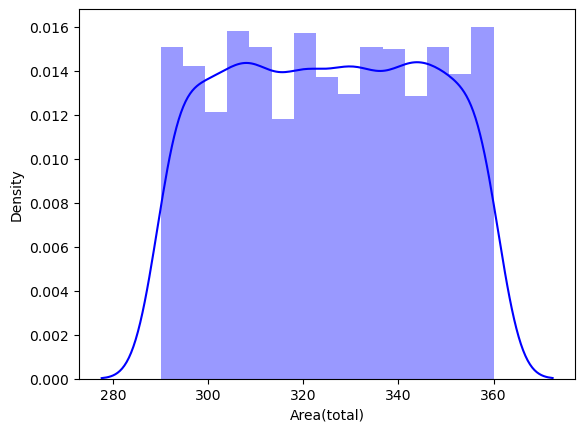

In [55]:
# 1.) area plot
sns.distplot(df["Area(total)"],color="blue")

conclusion: from visulaization we can see from 300 to 360 are was nealy uniform. 

In [56]:
# from that we can count out and according to that height will plot

pal= ["#659EC7","#4EE2EC","#AAF0D1","#2E8B57","#F5DEB3","#EE9A4D","#C11B17","#033E3E","#033E3E"]  # color code
def count_plot(df,col):
    ax=sns.countplot(df[col],linewidth=3,palette=pal[:df[col].nunique()])   
    for bar in ax.patches:
        h= bar.get_height()
        str1= str(h)
        x= bar.get_x()+bar.get_width()/2
        ax.annotate(str1, (x, h), va = "bottom", ha ="center" )  # centre having highest count from that

Text(0.5, 1.0, 'Number of properties with different number of Bed rooms')

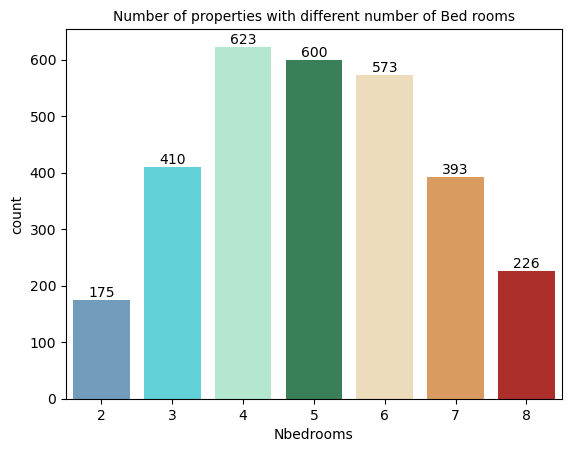

In [57]:
# Number of properties with different number of Bed rooms

count_plot(df,"Nbedrooms")
plt.title("Number of properties with different number of Bed rooms",size=10)

conclusion: from visualization no. of bedrooms 4,5 and 6 having the maximum from that that properties having 4 bedrooms that count 623 and that's maximum. 

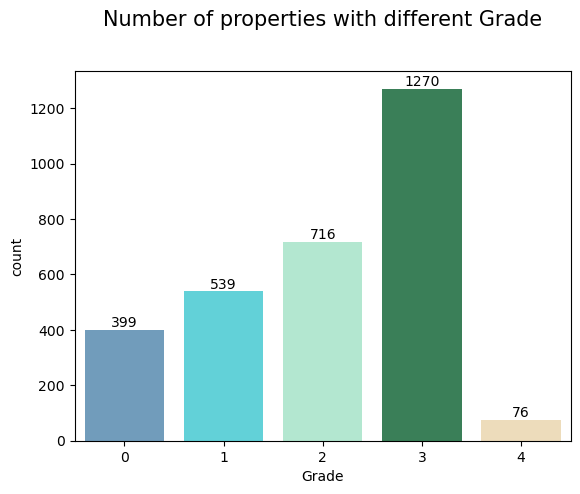

In [58]:
# 3.) Number of properties with different Grade

count_plot(df,"Grade")
plt.title("Number of properties with different Grade",size=15,y=1.1)
plt.show()

conclusion: In that D (3) type of grade having maximum count of grade. (Most of the room availablity)

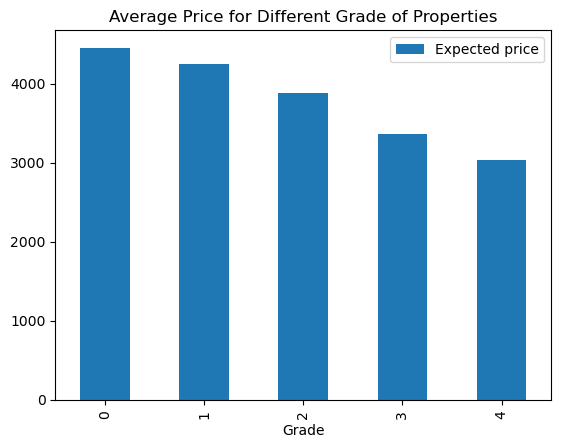

In [59]:
# 4.) Price for diffrent grade

pd.pivot_table(df,index= "Grade",values= ["Expected price"]).plot(kind="bar")
plt.title("Average Price for Different Grade of Properties");

conclusion: In that Grade A-(0) having maximum Average price that's near to 4500.

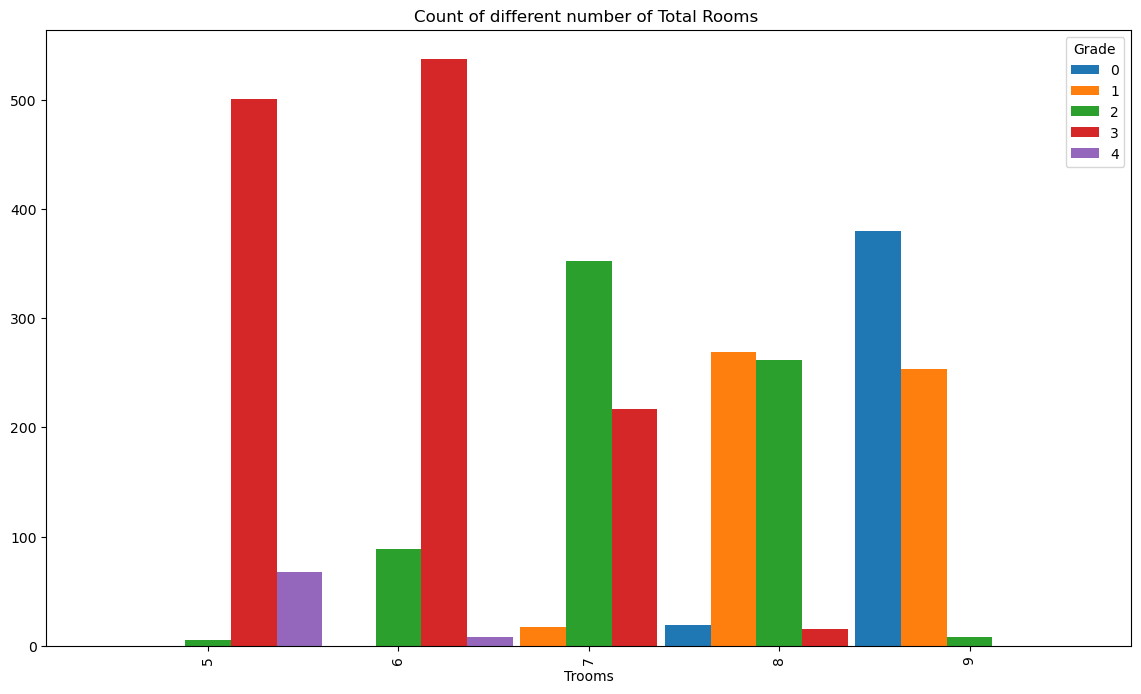

In [60]:
# 5.) Count of different number of Total Rooms

pd.crosstab(df.Trooms,df.Grade).plot(kind='bar',figsize=(14,8),width=1.2)
plt.title("Count of different number of Total Rooms ")
plt.show()

Conclusion: From Visualization Grade A-(0) having maximum counts of 9 rooms, Grade B-(1) having maximum counts of 8 rooms, Grade C-(2) having maximum counts of 7 rooms, Grade D-(3) having maximum counts of 6 rooms and Grade E-(4) having maximum counts of 5 rooms.

In [61]:
# 6.) Air Pollution Index wise Grade
pd.pivot_table(df,index= "Grade",values= ["API"])

,API
Grade,
0,71.857143
1,71.775510
2,71.509777
3,69.155906
4,55.065789


conclusion: In that Grade A-(0) having maximum air pollution index.

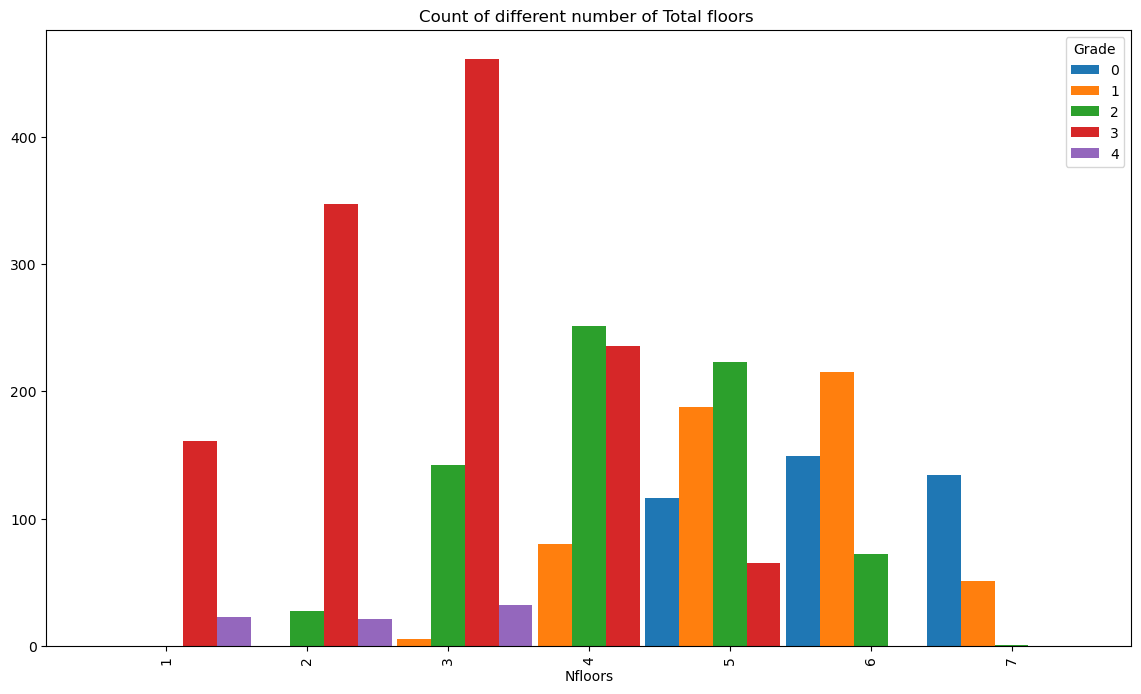

In [62]:
# 7.) Count of different number of Total floors

pd.crosstab(df.Nfloors,df.Grade).plot(kind='bar',figsize=(14,8),width=1.2)
plt.title("Count of different number of Total floors ")
plt.show()

conclusion: From Visualization count of Grade A-(0) having maximum 6 floors, count of Grade B-(1) having maximum 6 floors, count of Grade C-(2) having maximum 4 floors, count of Grade D-(3) having maximum 3 floors and count of Grade E-(4) having nearly same floor 1,2 and 3.

### Conclusion:


- for best model evalution we use four algorithms that's Naive Bayes Gaussian, Decision Tree Classifier, Stacking Classifier and Random Forest Classifier.

- from all four algorithms we find Stacking having good accuracy, f1-score, precision score and recall score that's around 86 %.

# Business Interpretation

- So, As per mention house having Grading system in that grade-A have best house and E have wrost condition.

- In dataset availablity of house plot area is 300 to 360 sq-m.

- In that Grade A- house consisting 8 to 9 rooms that's availble between 5 to 7 floors of that and for them average price was 4000 to 4500 and total available properties is 399.

- now Grade B- house having 7 to 9 rooms that availble on 3 to 7 floor, Average price of them near around 4000 and total availble properties is 539.

- Grade C- house having 5 to 9 rooms but from that 7 rooms are more that's availble on 2 to 6 floor, Average price of them less than 4000 and total availble properties is 716.

- Grade D- house having 5 to 8 rooms but from that 5 and 6 rooms are more that's availble on 1 to 5 floor, Average price of them less than 3500 and total availble properties is 1270.

- Grade E- house having 5 to 6 rooms that's availble between 1 to 3 floor, Average price of them near 3000 and total availble properties is 76.

- so on the above business interpretation people can decide which house he/she wants to prefer for buy.